# Pull Points Script Example
This Jupyter Notebook demonstrates my pull points script in action. I create this script principally to get around some of the query limits when pulling Geographic data. For example, when using the Google Places API, Google only allows you to pull for first 60 results. If you want data for a whole city, for example, you need to find some way of carving that city up into small sections that you can pull data on. This script does exactly that.

In the first step we import our city boundary shapefile (you can also skip this stage and import a polygon directly if you have one).

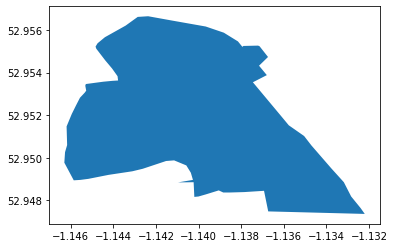

In [1]:
# Import your shapefile polygon
import geopandas as gpd
gdf = gpd.read_file('test_data/test_data.shp')
gdf.plot()

If you're working with actual geographic data then you should probably convert the Coordinate Reference System to a local metric one. In the example below, I use OSMNX's bbox from point function. The function is ordinarily used to return a bounding box of a particular size around a point. I don't actually want a bounding box, but the same function includes the ability to project the bouding box into a local local metric projection and returns the local CRS in the process. We just want to extract this CRS.

In [4]:
import osmnx as ox

# Get the centre point of our polygon which we will feed into OSMNX
centroid = gdf.iloc[0]['geometry'].centroid.y, gdf.iloc[0]['geometry'].centroid.x

# Get the local CRS from OSMXN
crs = ox.utils_geo.bbox_from_point(centroid, project_utm = True, return_crs = True)[-1]
crs

<Projected CRS: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

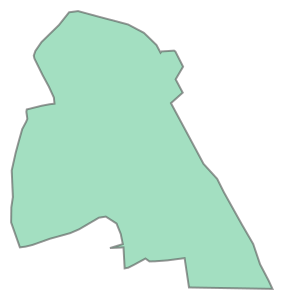

In [5]:
# Covnert our GDF into a local system
gdf = gdf.to_crs(crs)

# Extract the polgyon from the GDF
polygon = gdf.iloc[0]['geometry']
polygon

In [6]:
# Import my pull points script
from pull_points import get_pull_points
help(get_pull_points)

Help on function get_pull_points in module pull_points:

get_pull_points(poly, n, plot_map=False, plot_legend=False)
    This function will take a polygon, and try to segment it into an n approximately equally
    sized sections, returning the centre points of each section.
    
    If your polygon is bounday of a pyshical place (eg a city, town, etc) you should first 
    convert the coordinate reference system (CRS) to a local metric projection. See the Jupyter
         notebook on my Github profile as an example.
    
    poly            Polgon on which you wish to generate 'pull points'.
    n (int)         The number of sections you wish to split the polygon up into
    plot_map        True/False. Do you want to plot a map of the results
    plot legend    Do you want to plot the legend of the map?



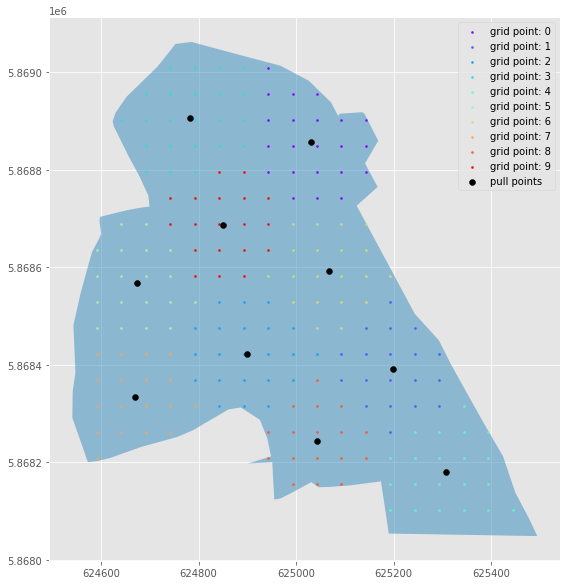

,pull_point,x,y,geometry
0,0,625031.556273,5.868856e+06,POINT (625031.556 5868855.765)
1,1,625198.841847,5.868391e+06,POINT (625198.842 5868390.747)
2,2,624899.216931,5.868422e+06,POINT (624899.217 5868421.637)
3,3,624783.246399,5.868906e+06,POINT (624783.246 5868906.485)
4,4,625308.295437,5.868180e+06,POINT (625308.295 5868180.263)
5,5,624673.087186,5.868568e+06,POINT (624673.087 5868567.666)
6,6,625068.063677,5.868592e+06,POINT (625068.064 5868592.378)
7,7,624669.270988,5.868333e+06,POINT (624669.271 5868332.710)
8,8,625042.964837,5.868243e+06,POINT (625042.965 5868242.736)
9,9,624850.100062,5.868686e+06,POINT (624850.100 5868685.612)


In [7]:
df = get_pull_points(polygon, 10, plot_map = True, plot_legend = True)
df

In [8]:
# Convert our points back into longitude and latitudes
df.crs = crs
df = df.to_crs("epsg:4326")
df['x'] = df.geometry.apply(lambda x: x.x)
df['y'] = df.geometry.apply(lambda x: x.y)
df

,pull_point,x,y,geometry
0,0,-1.138783,52.954730,POINT (-1.13878 52.95473)
1,1,-1.136474,52.950513,POINT (-1.13647 52.95051)
2,2,-1.140919,52.950860,POINT (-1.14092 52.95086)
3,3,-1.142458,52.955243,POINT (-1.14246 52.95524)
4,4,-1.134927,52.948596,POINT (-1.13493 52.94860)
5,5,-1.144227,52.952225,POINT (-1.14423 52.95222)
6,6,-1.138342,52.952355,POINT (-1.13834 52.95235)
7,7,-1.144374,52.950115,POINT (-1.14437 52.95011)
8,8,-1.138850,52.949219,POINT (-1.13885 52.94922)
9,9,-1.141548,52.953243,POINT (-1.14155 52.95324)


You can now iterate through these points to pull data from your desired API.

As an example, Initially, I explained you can only pull 60 results through Google Places API. Now you can pull 600 results (60 results from 10 locations around the city).